In [1]:
%matplotlib notebook

In [2]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os
import numpy as np
from scipy.stats import sem

In [3]:
#set variables for data files
mouse_metadata = os.path.join("Resources", "mouse_metadata.csv")
study_files = os.path.join("Resources", "study_results.csv")

#read the csv files
mouse_metadata = pd.read_csv(mouse_metadata)
study_files = pd.read_csv(study_files)
mouse_metadata.head()

#combine the data sets into one & preview
data_df = pd.merge(mouse_metadata, study_files, on="Mouse ID")
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
#Summary Statistics
#find: mean, median, variance, standard deviation, and standard error of measurement
#generate a bar plot of the data points, using both Pandas and Matplotlib

#group dataset by Drug Regimen and Timepoint, then find stats on Tumor Volume
tumor_mean = data_df.groupby(["Drug Regimen", "Timepoint"]).mean()["Tumor Volume (mm3)"]
tumor_median = data_df.groupby(["Drug Regimen", "Timepoint"]).median()["Tumor Volume (mm3)"]
tumor_variance = data_df.groupby(["Drug Regimen", "Timepoint"]).var()["Tumor Volume (mm3)"]
tumor_std = data_df.groupby(["Drug Regimen", "Timepoint"]).std()["Tumor Volume (mm3)"]
tumor_sem = data_df.groupby(["Drug Regimen", "Timepoint"]).sem()["Tumor Volume (mm3)"]

#put the stats into a dataframe
summary_stats_df = pd.DataFrame({"Mean": tumor_mean,
                                 "Median": tumor_median,
                                 "Variance": tumor_variance,
                                 "Standard Deviation": tumor_std,
                                 "Standard Error": tumor_sem})

#reset index & preview
#summary_stats_df = summary_stats_df.reset_index()
summary_stats_df

Mean     Median   Variance  Standard Deviation  \
Drug Regimen Timepoint                                                        
Capomulin    0          45.000000  45.000000   0.000000            0.000000   
             5          44.266086  45.597064   5.030889            2.242964   
             10         43.084291  43.421014  12.344133            3.513422   
             15         42.064317  42.798160  16.878693            4.108369   
             20         40.716325  40.716428  19.035028            4.362915   
...                           ...        ...        ...                 ...   
Zoniferol    25         55.432935  55.676604   5.808348            2.410052   
             30         57.713531  57.419744   9.601024            3.098552   
             35         60.089372  60.365832  10.876760            3.297993   
             40         62.916692  62.274543  13.958456            3.736102   
             45         65.960888  65.684689  14.100301            3.755037   

                        Standard Error  
Drug Regimen Timepoint                  
Capomulin    0                0.000000  
             5                0.448593  
             10               0.702684  
             15               0.838617  
             20               0.909731  
...                                ...  
Zoniferol    25               0.602513  
             30               0.800043  
             35               0.881426  
             40               0.998515  
             45               1.003576  

[100 rows x 5 columns]

In [ ]:
#bar plot using Pandas

#keep only Mean and Median columns from Summary Stats dataframe
summary_bar = summary_stats_df[["Mean", "Median"]]

#use df.plot() in order to create a bar chart of the data
summary_bar.plot(kind="bar", figsize=(20,5))

#format the bar chart
plt.title("Summary Statistics:\n" 
          "Tumor Volume by Drug, Across Lifespan of the Study")
plt.ylabel("Tumor Volume (mm3)")
plt.tight_layout()
plt.show()

#save to Images folder
plt.savefig(os.path.join("Images","pandas_summary_stats.png"))

In [ ]:
#MATPLOTLIB

In [5]:
summary_stats_df = summary_stats_df.reset_index()
summary_stats_df.head()

,Drug Regimen,Timepoint,Mean,Median,Variance,Standard Deviation,Standard Error
0,Capomulin,0,45.000000,45.000000,0.000000,0.000000,0.000000
1,Capomulin,5,44.266086,45.597064,5.030889,2.242964,0.448593
2,Capomulin,10,43.084291,43.421014,12.344133,3.513422,0.702684
3,Capomulin,15,42.064317,42.798160,16.878693,4.108369,0.838617
4,Capomulin,20,40.716325,40.716428,19.035028,4.362915,0.909731


In [ ]:
# Set x axis and tick locations
x_axis = np.arange(len(summary_stats_df))
tick_locations = [value for value in x_axis]

In [ ]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, summary_stats_df["Mean"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, summary_stats_df["Drug Regimen"], rotation="vertical")

In [ ]:
# Set x and y limits
plt.xlim(-.75, len(x_axis))
plt.ylim(0, max(summary_stats_df["Mean"])+10)

In [ ]:
# Set a Title and labels
plt.title("Summary Statistics:\n" 
          "Tumor Volume by Drug, Across Lifespan of the Study")
plt.xlabel("Drug Regimen, Timepoint")
plt.ylabel("Tumor Volume (mm3)")

In [ ]:
# Save our graph and show the graph
plt.tight_layout()
plt.show()

In [ ]:
#END MATPLOTLIB

In [7]:
#testing the counts and various numbers so I can check against my functions below
#keep for now, delete for final output

drug_types = data_df["Drug Regimen"].unique()
print(drug_types)

drug_counts = data_df["Drug Regimen"].value_counts()
print(drug_counts)

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64


In [ ]:
#Create pie charts (one using Pandas, the other Matplotlib) to show the mice gender distribution in the study

#the total number of mice
total_mice = len(data_df["Mouse ID"].unique())
#delete print command
print(total_mice)

#removing duplicate "Mouse ID" rows
gender_df = data_df.loc[:, ["Mouse ID", "Sex"]]
gender_df = gender_df.drop_duplicates()

#find the total of males and females
gender_total = gender_df["Sex"].value_counts()
#delete print and type commands
print(gender_total)
type(gender_total)

gender_df = pd.DataFrame({"Gender": gender_total})
#delete below
gender_df


In [ ]:
#generate a pie plot showing the distribution of female versus male mice using matplotlib

#create labels for sections of the pie and corresponding colors
labels = ["Male", "Female"]
colors = ["lightskyblue", "pink"]

#plot the pie chart
plt.pie(gender_total, labels=labels, colors=colors, autopct="%1.1f%%", shadow=False, startangle=140)

In [ ]:
#save to Images folder
plt.savefig(os.path.join("Images","pyplot_pie.png"))

In [ ]:
#generate a pie plot showing the distribution of female versus male mice using pandas
#gender_pie = gender_df.plot(kind="pie", subplots="True", figsize=(5,5))
gender_pie = gender_df.plot(kind="pie", subplots="True", autopct="%1.1f%%", colors=colors)# figsize=(8, 5))

In [ ]:
#save to Images folder
plt.savefig(os.path.join("Images","pandas_pie.png"))

In [8]:
#calculate the final tumor volume of each mouse across four of the most promising treatment regimens
#calculate the IQR and quantitatively determine if there are any potential outliers

#first group my data by Timepoint and Drug Regimen
#then look at Tumor Volume
grouped_df = data_df.groupby(["Drug Regimen", "Timepoint"])
MeanTumorVolume = grouped_df["Tumor Volume (mm3)"].mean()

#create dataframe from the series created above
MeanTumorVolume_df = pd.DataFrame(MeanTumorVolume)

#need Drug Regimen & Timepoint as columns, so reset index
MeanTumorVolume_df = MeanTumorVolume_df.reset_index()
MeanTumorVolume_df

,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [9]:
#reformat in order to find four 'best' drug treatments and for future plotting (?????? on the future plotting)
pivot_MeanTumorVolume_df = MeanTumorVolume_df.pivot(index="Timepoint", columns="Drug Regimen", values="Tumor Volume (mm3)")
pivot_MeanTumorVolume_df

#4 'best' treatments: Ramicane, Capomulin, Ceftamin, Infubinol

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,46.541247,47.389175,46.796098,47.125589,47.248967,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,53.970080,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.172821,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.870528,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.432021,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [10]:
#calculate the final tumor volume of each mouse across four of the most promising treatment regimens
top_four = pivot_MeanTumorVolume_df[["Ramicane", "Capomulin", "Ceftamin", "Infubinol"]]
top_four
#calculate the IQR and quantitatively determine if there are any potential outliers. 

Drug Regimen,Ramicane,Capomulin,Ceftamin,Infubinol
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,43.944859,44.266086,46.503051,46.541247
10,42.531957,43.084291,48.285125,49.403909
15,41.495061,42.064317,50.094055,51.296397
20,40.238325,40.716325,52.157049,53.197691
25,38.974300,39.939528,54.287674,55.715252
30,38.703137,38.769339,56.769517,58.299397
35,37.451996,37.816839,58.827548,60.742461
40,36.574081,36.958001,61.467895,63.162824


In [11]:
ramicane_result = top_four.iloc[9, 0]
capomulin_result = top_four.iloc[9, 1]
ceftamin_result = top_four.iloc[9, 2]
infubinol_result = top_four.iloc[9, 3]

results_df = pd.DataFrame({"Ramicane": [ramicane_result],
                           "Capomulin": [capomulin_result],
                           "Ceftamin": [ceftamin_result],
                           "Infubinol": [infubinol_result]})
results_df

,Ramicane,Capomulin,Ceftamin,Infubinol
0,34.955595,36.236114,64.132421,65.755562


In [12]:
MeanTumorVolume_df = MeanTumorVolume_df.rename(columns={"Drug Regimen": "Drug"})
MeanTumorVolume_df

drugs = ["Ramicane", "Capomulin", "Ceftamin", "Infubinol"]
MeanTumorVolume_df.Drug.isin(drugs)
top_drugs = MeanTumorVolume_df[MeanTumorVolume_df.Drug.isin(drugs)]
top_drugs

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [13]:
end_time = top_drugs["Timepoint"] == 45
final_tumor = top_drugs[end_time]
final_tumor

,Drug,Timepoint,Tumor Volume (mm3)
9,Capomulin,45,36.236114
19,Ceftamin,45,64.132421
29,Infubinol,45,65.755562
79,Ramicane,45,34.955595


<IPython.core.display.Javascript object>


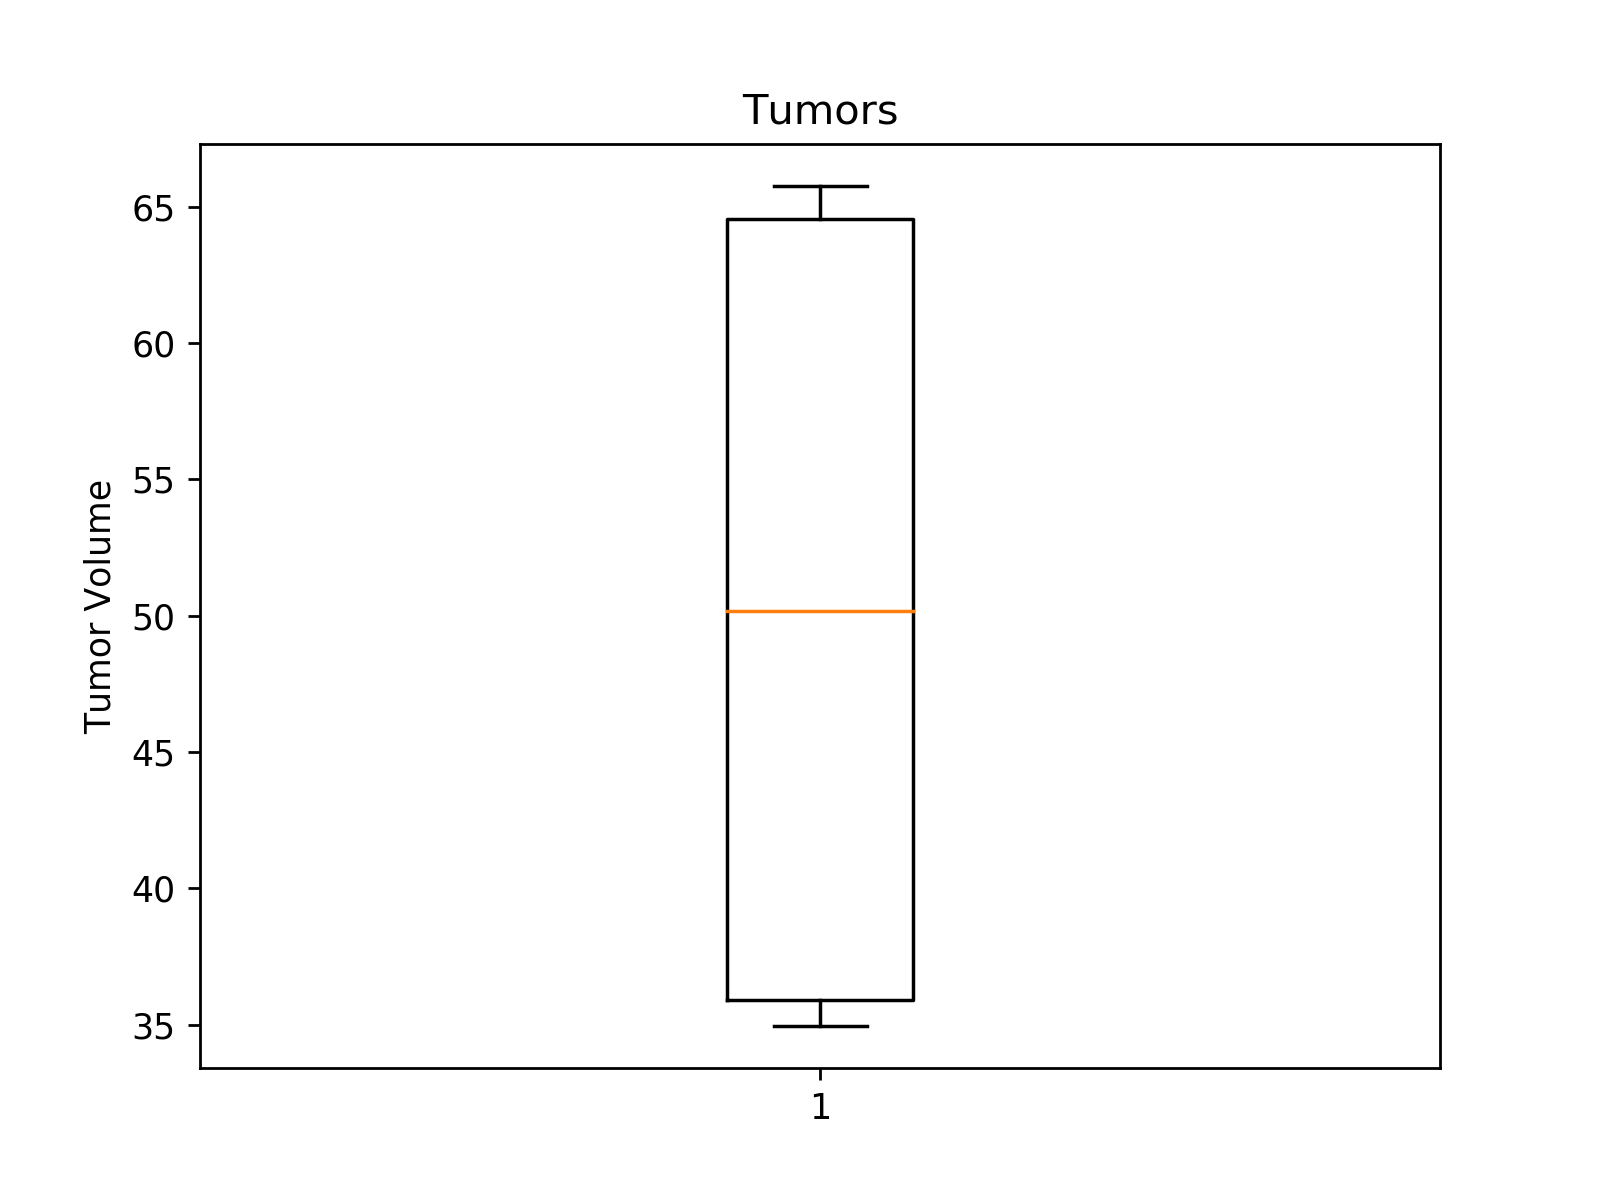

In [14]:
#THE FINAL TUMOR SIZE FOR THE TOP FOUR DRUGS (only four values)
volumes = final_tumor["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(volumes)
plt.show()

In [ ]:
#THE FINAL TUMOR SIZE FOR THE TOP FOUR DRUGS (only four values)
quartiles = volumes.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volumes is: {lowerq}")
print(f"The upper quartile of tumor volumes is: {upperq}")
print(f"The interquartile range of tumor volumes is: {iqr}")
print(f"The the median of tumor volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

In [ ]:
#ALL TUMOR VOLUMES, ALL DRUGS
volumes = data_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(volumes)
plt.show()

In [ ]:
#ALL TUMOR VOLUMES, ALL DRUGS
quartiles = volumes.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volumes is: {lowerq}")
print(f"The upper quartile of tumor volumes is: {upperq}")
print(f"The interquartile range of tumor volumes is: {iqr}")
print(f"The the median of tumor volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

In [ ]:
#ALL TUMOR VOLUMES OF THE TOP FOUR DRUGS
volumes = top_drugs["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(volumes)
plt.show()

In [ ]:
#ALL TUMOR VOLUMES OF THE TOP FOUR DRUGS
quartiles = volumes.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volumes is: {lowerq}")
print(f"The upper quartile of tumor volumes is: {upperq}")
print(f"The interquartile range of tumor volumes is: {iqr}")
print(f"The the median of tumor volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

In [20]:
#LINE AND SCATTER PLOTS
#generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#create dataframe looking at Capomulin
capomulin_df = pivot_MeanTumorVolume_df["Capomulin"]
capomulin_df

capo_df = pd.DataFrame(capomulin_df)
capo_df

capo = capo_df.reset_index()
capo

,Timepoint,Capomulin
0,0,45.000000
1,5,44.266086
2,10,43.084291
3,15,42.064317
4,20,40.716325
5,25,39.939528
6,30,38.769339
7,35,37.816839
8,40,36.958001
9,45,36.236114
